In [1]:
import pandas as pd
dataFrame = pd.read_csv("Housing.csv")
data_copy_1 = dataFrame.copy()
data_copy_1.dropna(axis='index',how='any',inplace=True)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataFrame, random_state=0)


In [2]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [3]:
X=data_copy_1[["area"]]
Y=data_copy_1["price"]
reg.fit(X,Y)

LinearRegression()

In [4]:
print("The bias is", reg.intercept_)
print("The feature coefficients are", reg.coef_)

The bias is 2387308.4823964303
The feature coefficients are [461.97489427]


2387308.4823964303 461.9748942727834


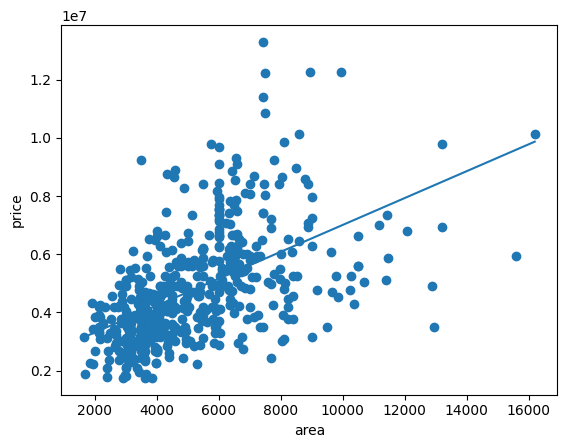

In [5]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
print(theta0, theta1)
def the_line(h, bias, coef):
    return bias + coef * h

min_height = data_copy_1["area"].min()
min_weight = the_line(min_height, theta0, theta1)
max_height = data_copy_1["area"].max()
max_weight = the_line(max_height, theta0, theta1)
line_x = [min_height, max_height]
line_y = [min_weight, max_weight]


import matplotlib.pyplot as plt
plt.scatter(data_copy_1["area"], data_copy_1["price"])
plt.xlabel("area")
plt.ylabel("price")
plt.plot(line_x, line_y)
plt.show()


In [6]:
print(reg.score(X,Y))

0.2872931546811468


The results aren't great, the data does not appear to have a good linear regression.
Probably need a better data set.
For now I plan on web scraping Zillow for another dataset.

In [7]:
from sklearn.linear_model import LinearRegression
reg_plus_quad = LinearRegression()

X = data_copy_1[["area"]]
Y = data_copy_1["price"]

from sklearn.preprocessing import PolynomialFeatures
create_quad_terms = PolynomialFeatures(degree=2, include_bias=False)
X_quad_terms = create_quad_terms.fit_transform(X)

                
                
reg_plus_quad.fit(X_quad_terms, Y)

print(reg_plus_quad.score(X_quad_terms,Y))



0.3230746205562587


A quadratic fit to the regression appears to do better

In [8]:
from sklearn.linear_model import LinearRegression
reg_plus_cube = LinearRegression()

X = data_copy_1[["area"]]
Y = data_copy_1["price"]

from sklearn.preprocessing import PolynomialFeatures
create_cube_terms = PolynomialFeatures(degree=3, include_bias=False)
X_cube_terms = create_cube_terms.fit_transform(X)

                
                
reg_plus_cube.fit(X_cube_terms, Y)

print(reg_plus_cube.score(X_cube_terms,Y))


0.32504534381488304


A cubic fit does not appear to do much better than a quadratic fit

I have learned that my data set is not strongly correlated between price and area